In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import scipy.stats as st

In [25]:
nombres=['Ib','Ig','Id','temp','humidity','presion','solar_altitude','azimuth']
dfrad=pd.read_csv('../01_weather_data/02_cleaned_data/esoru_night_angles_2.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres)
dfrad['minutodia']=(dfrad.index.hour*60)+dfrad.index.minute
dfrad

,Ib,Ig,Id,temp,humidity,presion,solar_altitude,azimuth,minutodia
2019-01-01 00:00:00,0.0,0.0,0.0,17.85,59.02,875.2408,-79.806160,166.773196,0
2019-01-01 00:10:00,0.0,0.0,0.0,18.29,59.84,875.1749,-81.878940,170.053742,10
2019-01-01 00:20:00,0.0,0.0,0.0,17.92,60.08,874.8231,-83.764991,173.367191,20
2019-01-01 00:30:00,0.0,0.0,0.0,17.91,61.51,874.7002,-85.236372,176.703016,30
2019-01-01 00:40:00,0.0,0.0,0.0,17.94,61.41,874.6029,-85.827949,-179.949903,40
...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,0.0,0.0,0.0,20.94,58.99,877.1380,-68.725457,151.345160,1390
2019-12-31 23:20:00,0.0,0.0,0.0,21.20,58.03,876.9656,-71.001501,154.338568,1400
2019-12-31 23:30:00,0.0,0.0,0.0,21.52,56.33,876.6717,-73.264218,157.400817,1410
2019-12-31 23:40:00,0.0,0.0,0.0,21.67,57.35,877.0899,-75.506650,160.527038,1420


In [26]:
dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
# dfmingroup#['Global','prediccion','mae']


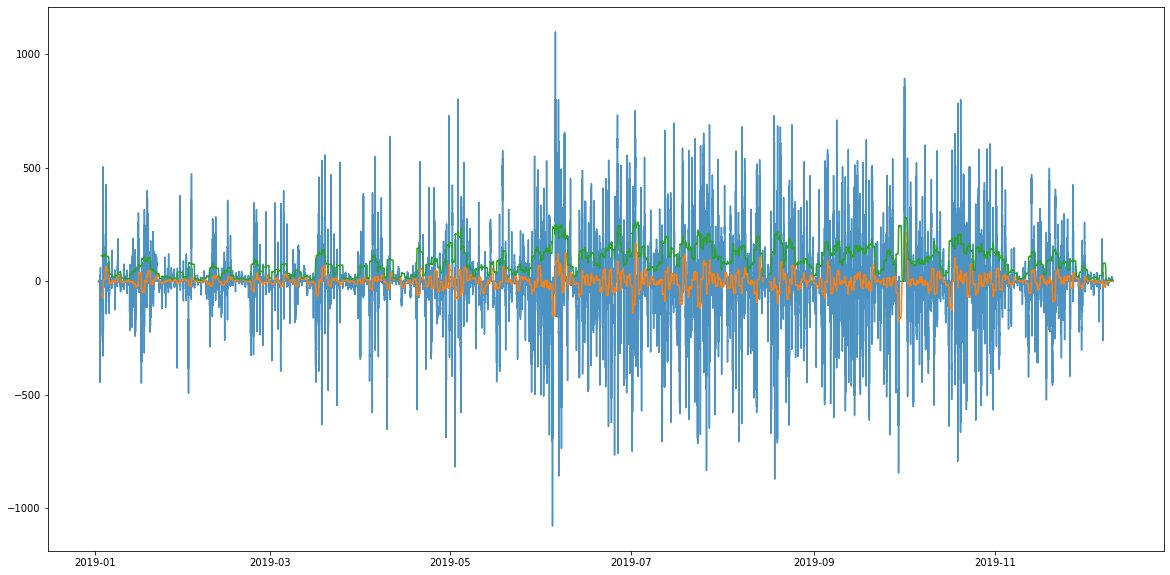

In [76]:
plt.figure(figsize=(20,10))
data=dfrad.Ig.loc['2019-01-01':'2019-12-10'].diff(144)
plt.plot(data,alpha=.8)
plt.plot(data.rolling(144).mean())
plt.plot(data.rolling(144).std())


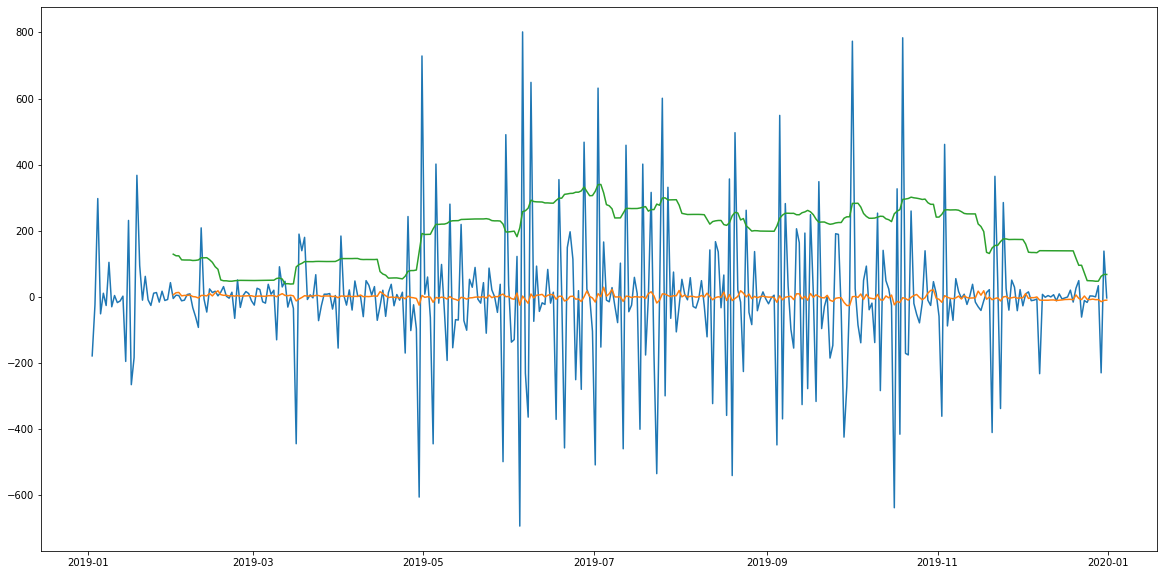

In [41]:
plt.figure(figsize=(20,10))
df_diff=dfmingroup.Ig.loc[800].loc['2019-01':'2019-12'].diff()
plt.plot(df_diff)
plt.plot(df_diff.rolling(30).mean())
plt.plot(df_diff.rolling(30).std())


In [111]:
data=dfmingroup.Ig.loc[720].loc['2019-01':'2019-12'].diff()
# tolerance=.99*(np.mean(data)/np.sqrt(len(data)))
tolerance=(1.96/np.sqrt(len(data[2::])))
tolerance

0.10287332069196968

Text(0.5, 0, 'Lags')

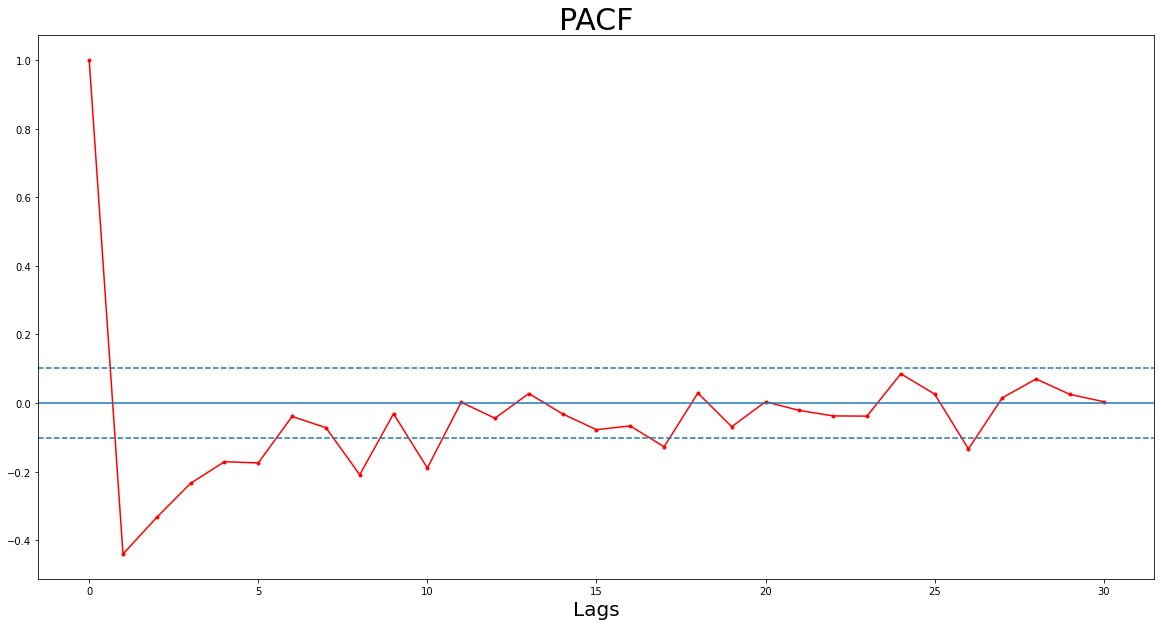

In [112]:
fig, ax=plt.subplots(figsize=(20,10))
# ax.plot(pacf(tmx_2018.Ig,nlags=14))
ax.plot(pacf(data[3::],nlags=30),'r.-')
# plt.bar(range(30),pacf(data[2::],nlags=30)[::30])
ax.axhline(y=tolerance,linestyle='--')
ax.axhline(y=-tolerance,linestyle='--')
ax.axhline(y=0,linestyle='-')
# # ax.plot(pacf(tmx_2018.Ig[5:int(144*7)],nlags=144*3))
# # plt.bar(range(lags),pacf(tmx_2018.Ig[5:int(144*7)],nlags=144*4))
# plt.grid()
# ax.set_xlim(0)
# pacf(df_diff,nlags=144)
# ax.grid()
plt.title('PACF',fontsize=30)
plt.xlabel('Lags',fontsize=20)
# plt.savefig('../../Tesis_repo/figures/pacf.png')

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 0, 'Lags')

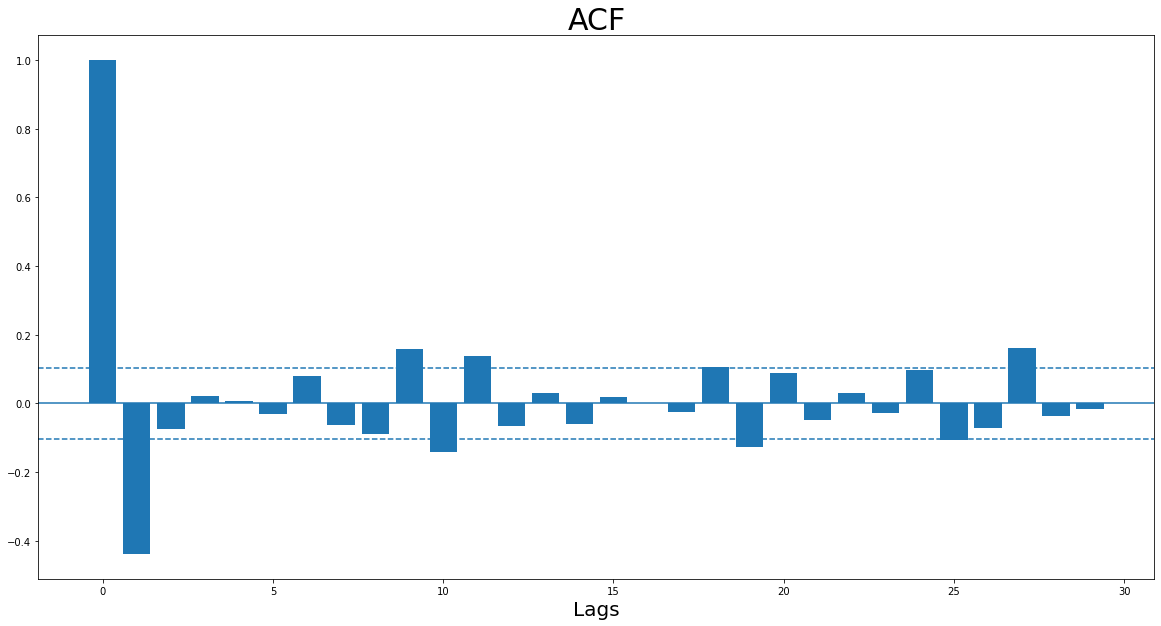

In [113]:
lags=30
acf_vals=acf(data[3::],nlags=lags)
fig, ax=plt.subplots(figsize=(20,10))
# # plt.figure(figsize=(20,10))
plt.bar(range(lags),acf_vals[:lags])
ax.axhline(y=tolerance,linestyle='--')
ax.axhline(y=-tolerance,linestyle='--')
ax.axhline(y=0,linestyle='-')
# # ax.set_xlim(144*3)
# # ax.set_ylim(-.15,.15)
# ax.grid()
plt.title('ACF',fontsize=30)
plt.xlabel('Lags',fontsize=20)
# plt.savefig('../../Tesis_repo/figures/acf.png')

In [151]:
df_diff.mean()

-4.9733333333333345

In [152]:
df_diff.std()

129.23630837461604